In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from IPython.display import clear_output 

from src.videotools import read_video
from src.processing import get_frame_colors, PixelColor, get_clouds

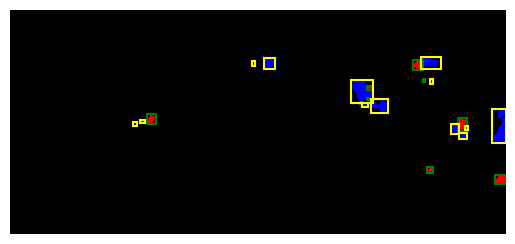

In [17]:
PAUSE = 1/100
SENSIVITY = 70


def plot_cloud(cloud, color: str):
    (x_min, x_max), (y_min, y_max) = cloud.bounding_box()
    plt.gca().add_patch(patches.Rectangle((y_min - 1, x_min - 1), y_max - y_min + 2, x_max - x_min + 2, edgecolor=color, facecolor='none', linewidth=1.5))


for frame in read_video('../data/image04.wmv'):
    clear_output(True)
    colors = get_frame_colors(frame, sensivity=SENSIVITY)
    red_clouds = get_clouds(colors, PixelColor.RED)
    f = np.zeros_like(frame, dtype=np.uint8)
    f[:, :, 0] += colors == PixelColor.RED.value
    f[:, :, 2] += colors == PixelColor.BLUE.value
    plt.imshow(255 * f)
    ax = plt.gca()
    for cloud in red_clouds:
        plot_cloud(cloud, 'green')
    blue_clouds = get_clouds(colors, PixelColor.BLUE)
    for cloud in blue_clouds:
        plot_cloud(cloud, 'yellow')
    plt.axis('off')
    plt.pause(PAUSE)
    plt.show()